# <b> Sales performance </b>

 ## <b> Defining objectives and questions </b>

### 1. Trends in sales and revenue performance
### 2. Promotions trends and effectiveness
### 3. Defining ROI and calculting it

In [1]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
%matplotlib inline

### <b> Collecting and loading the data </b>

In [2]:
 # Importing the files

df_sales = pd.read_excel('/Users/ignacyklimont/Documents/sales_data.xlsx', converters= {'Date': pd.to_datetime})
df_promo = pd.read_excel('/Users/ignacyklimont/Documents/promo_data.xlsx', converters= {'start_date': pd.to_datetime, 'end_date': pd.to_datetime})

In [3]:
# Making sure df_sales is sorted by date

df_sales.sort_values(by=['Date'])

,Date,Units_sold,Revenue
0,2019-01-06,0,0.000000
1,2019-01-07,330,1650.488230
2,2019-01-08,300,1500.550677
3,2019-01-09,297,1485.243269
4,2019-01-10,300,1501.154046
...,...,...,...
995,2021-09-27,1024,5124.649818
996,2021-09-28,956,4783.189813
997,2021-09-29,821,4107.257303
998,2021-09-30,824,4124.920357


### <b> Data cleaning </b>

In [4]:
# Basic exploration

df_sales.head(10)

,Date,Units_sold,Revenue
0,2019-01-06,0,0.000000
1,2019-01-07,330,1650.488230
2,2019-01-08,300,1500.550677
3,2019-01-09,297,1485.243269
4,2019-01-10,300,1501.154046
5,2019-01-11,299,1496.144377
6,2019-01-12,373,1866.224289
7,2019-01-13,0,0.000000
8,2019-01-14,299,1497.688358
9,2019-01-15,284,1420.347481


<b> No null values in each column </b>

Therefore we can proceed further

In [5]:
# Index from 0 to 999
# Count = 1000 rows
# No null values

df_sales.info()
df_sales.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1000 non-null   datetime64[ns]
 1   Units_sold  1000 non-null   int64         
 2   Revenue     1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.6 KB


Date          False
Units_sold    False
Revenue       False
dtype: bool

In [6]:
df_sales[df_sales['Units_sold'] == 0]

,Date,Units_sold,Revenue
0,2019-01-06,0,0.0
7,2019-01-13,0,0.0
14,2019-01-20,0,0.0
21,2019-01-27,0,0.0
28,2019-02-03,0,0.0
...,...,...,...
966,2021-08-29,0,0.0
973,2021-09-05,0,0.0
980,2021-09-12,0,0.0
987,2021-09-19,0,0.0


<b> We can see regularity in the data: on every Sunday the sales are equal to zero </b>

We are interested in sales and revenue performance, therefore we want to analyse only those days on which the retailer was active
Apart from those dates, the sales are never close to zero, hence sales equal to zero must indicate special circumstances (ergo the retailer is not operating)

<b> Thus, we drop the rows in which units sold equal to zero and focus on active days </b>

In [7]:
# Drops the rows were the Units_sold = 0, indicating that on that day the shop was not operating

df_sales = df_sales[df_sales['Units_sold'] != 0]
df_sales

,Date,Units_sold,Revenue
1,2019-01-07,330,1650.488230
2,2019-01-08,300,1500.550677
3,2019-01-09,297,1485.243269
4,2019-01-10,300,1501.154046
5,2019-01-11,299,1496.144377
...,...,...,...
995,2021-09-27,1024,5124.649818
996,2021-09-28,956,4783.189813
997,2021-09-29,821,4107.257303
998,2021-09-30,824,4124.920357


<b> Number of rows decreased from 1000 to 857, therefore we have lost 14.3% of data </b>

That is an acceptable trade-off for having more robust and clear picture of trends

<b> Having cleaned the data, we can now proceed with search for trends in the dataset </b>

In [8]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 1 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        857 non-null    datetime64[ns]
 1   Units_sold  857 non-null    int64         
 2   Revenue     857 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 26.8 KB


<b> The mean revenue per unit sold during non-promo days (without any discount) is equal to 5.00 </b>

In [9]:
unit_mean_price = round(df_sales.iloc[0,2] / df_sales.iloc[0,1], 2)
unit_mean_price

5.0

# <b> Trends analysis <b>

<b> General statistical picture of the sales data </b>

In [10]:
# Basic statistical analysis

df_sales.describe()

,Units_sold,Revenue
count,857.000000,857.000000
mean,713.499417,3409.709861
std,263.215803,1146.263990
min,278.000000,1352.221004
25%,504.000000,2394.880535
50%,734.000000,3334.830152
75%,883.000000,4352.173679
max,1923.000000,6576.804154


In [11]:
# Year to year mean units sales increase

year_2019 = df_sales.loc[df_sales['Date'].dt.year == 2019]
year_2020 = df_sales.loc[df_sales['Date'].dt.year == 2020]
year_2021 = df_sales.loc[df_sales['Date'].dt.year == 2021]
df_years = pd.DataFrame({'Yearly_mean_sales':[year_2019['Units_sold'].mean(), year_2020['Units_sold'].mean(), year_2021['Units_sold'].mean()]})
df_years['Year_to_year_%_change'] = round(df_years['Yearly_mean_sales'].pct_change() * 100, 1)
df_years

,Yearly_mean_sales,Year_to_year_%_change
0,473.188312,NaN
1,788.044586,66.5
2,928.855319,17.9


### <b> Sales week to week growth </b>

Interval chosen is per week to see if there are some weekly outliers (e.g. due to promotion period)
The big picture: sharp overall increase in units sold: very positive and important indicator
<b> Higher sales = increasing brand awareness, increasing customer base (does not imply higher profit) </b>

<b> TREND 2: clear outliers - seven intervals of significant upsurge in sales. Working theory: result of promotion periods </b>

<b> TREND 3: keeping in mind that the growth is much slower in third year (17.9%), we can see that it is driven by single and short sales shoot up period. In fact, the last week of 2021 in our data has lower than the first. We can therefore see that in 2021 sales stagnate and even slighly fall down. The stagnation is disorted by single boom period that drives the growth </b>

Sales percentage increase from the first week to the last week: 188.85%


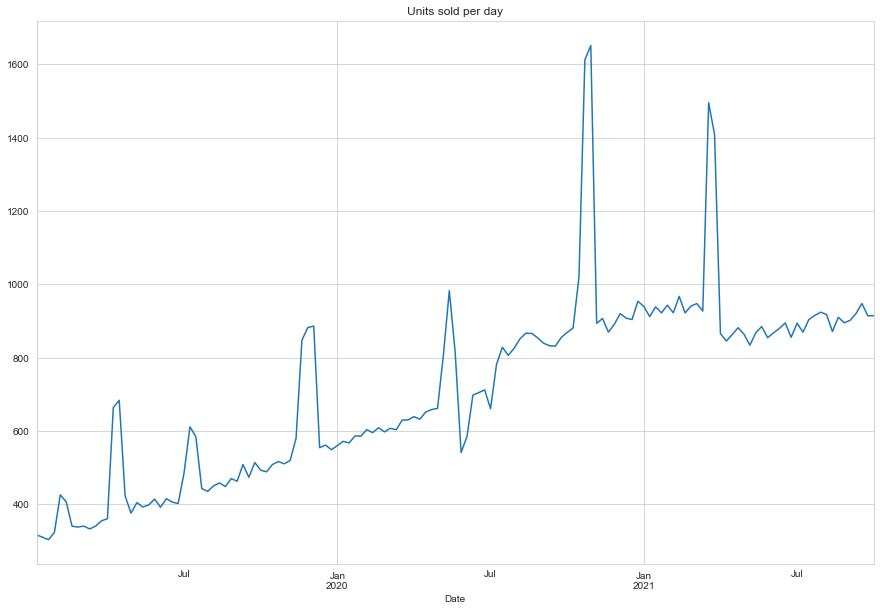

In [12]:
# Sales per week

df_sales_weekly = df_sales.groupby(pd.PeriodIndex(df_sales['Date'], freq="W"))['Units_sold'].mean()
df_sales_weekly.plot(figsize = (15,10))
plt.title('Units sold per day')
inc = ((df_sales_weekly.iloc[-1] - df_sales_weekly.iloc[0]) / df_sales_weekly.iloc[0] * 100).round(decimals = 2)
print(f'Sales percentage increase from the first week to the last week: {inc}%')

### <b> Revenue year to year growth </b>

First we check year to year revenue growth
Analogically to sales, we see that the growth from 2019 to 2020 was much more significant (70.9%) than from 2020 to 2021 (21.5%)

<b> TREND 4: Year to year growth in revenue was slightly higher than in sales. It might be due to better implemented promotion periods, e.g. lower discount and hence higher revenue </b>

In [13]:
# Year to year mean units sales increase

year_2019 = df_sales.loc[df_sales['Date'].dt.year == 2019]
year_2020 = df_sales.loc[df_sales['Date'].dt.year == 2020]
year_2021 = df_sales.loc[df_sales['Date'].dt.year == 2021]
df_years_rev = pd.DataFrame({'Yearly_mean_revenue':[year_2019['Revenue'].mean(), year_2020['Revenue'].mean(), year_2021['Revenue'].mean()]})
df_years_rev['Year_to_year_%_change'] = round(df_years_rev['Yearly_mean_revenue'].pct_change() * 100, 1)
df_years_rev

,Yearly_mean_revenue,Year_to_year_%_change
0,2192.264120,NaN
1,3747.449289,70.9
2,4554.063510,21.5


### <b> Revenue week to week growth </b>

The peaks are much less clear: probably due to the fact that the revenue for promo periods is lowered by lower price per unit

<b> TREND 5: Peak intervals in revenue are significantly lower than sales peaks, especially in 2019. It implies that those peaks are caused by promotions, showing that discount reduces significantly revenue. </b>

<b> To confirm the hypothesis function is constructed to differentiate between promo days and regular days and give a clear picture of trends </b>

Revenue percentage increase from the first week to the last week: 188.94%


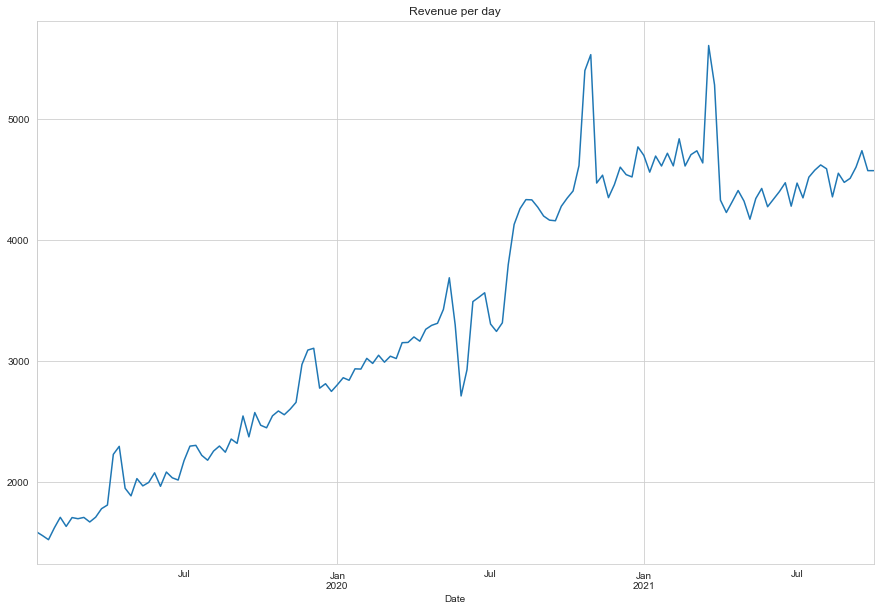

In [14]:
# Revenue per week

df_rev_weekly = df_sales.groupby(pd.PeriodIndex(df_sales['Date'], freq="W"))['Revenue'].mean()
df_rev_weekly.plot(figsize = (15,10))
plt.title('Revenue per day')
inc = ((df_rev_weekly.iloc[-1] - df_rev_weekly.iloc[0]) / df_rev_weekly.iloc[0] * 100).round(decimals = 2)
print(f'Revenue percentage increase from the first week to the last week: {inc}%')

### <b> Dividing rows to promo and non-promo days </b>

Following general analysis column 'Promo' is created to differentiate days with and without promotional unit prices

In [15]:
# Creating column "Promo" for categorical variable indicating whether a day is a promo day or not (0 = not, 1 = promo day)

df_sales.loc[:,'Promo'] = 0
df_sales.head()

,Date,Units_sold,Revenue,Promo
1,2019-01-07,330,1650.488230,0
2,2019-01-08,300,1500.550677,0
3,2019-01-09,297,1485.243269,0
4,2019-01-10,300,1501.154046,0
5,2019-01-11,299,1496.144377,0


In [16]:
# Tagging days within the promo period with value 1 in "Promo" column

def promo_period():
	global df_promo
	global df_sales
	x2 = 0
	while x2 < 8:
		start_date = df_promo.iloc[x2, 1]
		end_date = df_promo.iloc[x2, 2]
		period = ((df_sales.loc[:, 'Date'] >= start_date) & (df_sales.loc[:, 'Date'] < end_date))
		df_sales.loc[period, 'Promo'] = 1
		x2 += 1
	print(df_sales)
promo_period()

          Date  Units_sold      Revenue  Promo
1   2019-01-07         330  1650.488230      0
2   2019-01-08         300  1500.550677      0
3   2019-01-09         297  1485.243269      0
4   2019-01-10         300  1501.154046      0
5   2019-01-11         299  1496.144377      0
..         ...         ...          ...    ...
995 2021-09-27        1024  5124.649818      0
996 2021-09-28         956  4783.189813      0
997 2021-09-29         821  4107.257303      0
998 2021-09-30         824  4124.920357      0
999 2021-10-01         946  4734.264010      0

[857 rows x 4 columns]


# <b> Trend analysis with days differentiation </b>

### <b> Sales per day with promo days highlighted </b>

The promo days are labelled with red, whereas no promo days are blue

<b> TREND 6: We can see a very clear tendency showing that promotion period almost always initiate a rapid boost in sales (7 out of 8 cases) <b>

<b> TREND 7: The difference is very significant: virtually all days with highest sales (unit sales above 1250) are within promo periods </b>

More sales trends will be discussed later after more in-depth statistical analysis of data

Text(0.5, 1.0, 'Units sold per day')

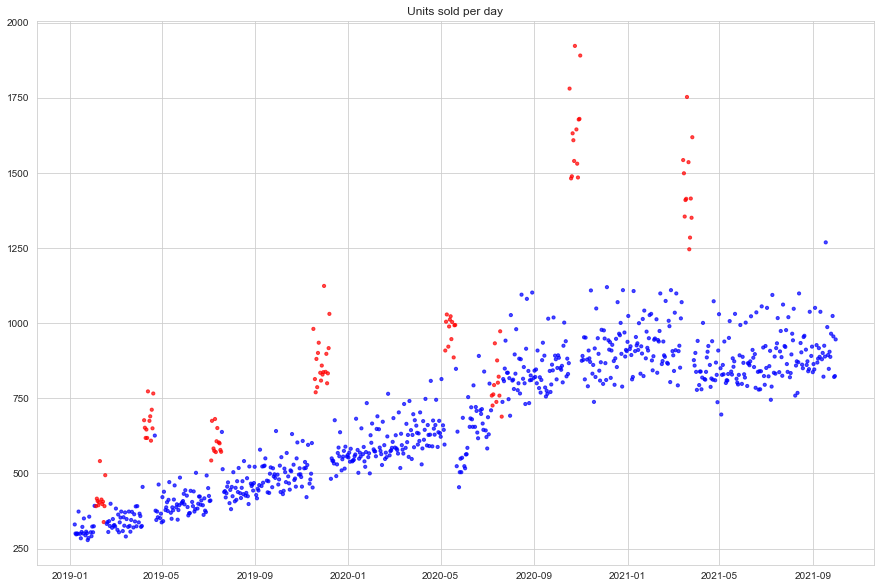

In [17]:
# Units sold per day, yellow indicate promo periods
# Promotion periods are clear outliers

x = df_sales['Date']
y = df_sales['Units_sold']
z = df_sales['Promo']
plt.figure(figsize=(15,10))
plt.scatter(x,y, c = z, s = 10, alpha = 0.7, cmap = 'bwr')
plt.title('Units sold per day')

<b> Units sold day to day percentage change </b>

<b> TREND 8: All three days with the highest units sold d/d percentage change were first day of different promos </b>

Two of them had an incredible increase of more than 100%
Therefore, we can clearly see that some promotions are driving a huge initial boost in sales

In [18]:
# All days with the highest units sold d/d percentage change were "promo days"

df_sales['Units_pct_change'] = df_sales['Units_sold'].pct_change()
df_sales['Units_pct_change'] = df_sales['Units_pct_change'] * 100
df_sales[(df_sales['Units_pct_change'] > 50)]

,Date,Units_sold,Revenue,Promo,Units_pct_change
314,2019-11-16,981,3434.940967,1,116.556291
487,2020-05-07,909,3409.942755,1,52.516779
650,2020-10-17,1781,5967.021898,1,105.420992


Day to day percentage changes in units sold
Promo days are responsible for most significant uptake in units sold compared to previous days

Text(0.5, 1.0, 'Day to day percentage change in units sold (100 = 100%)')

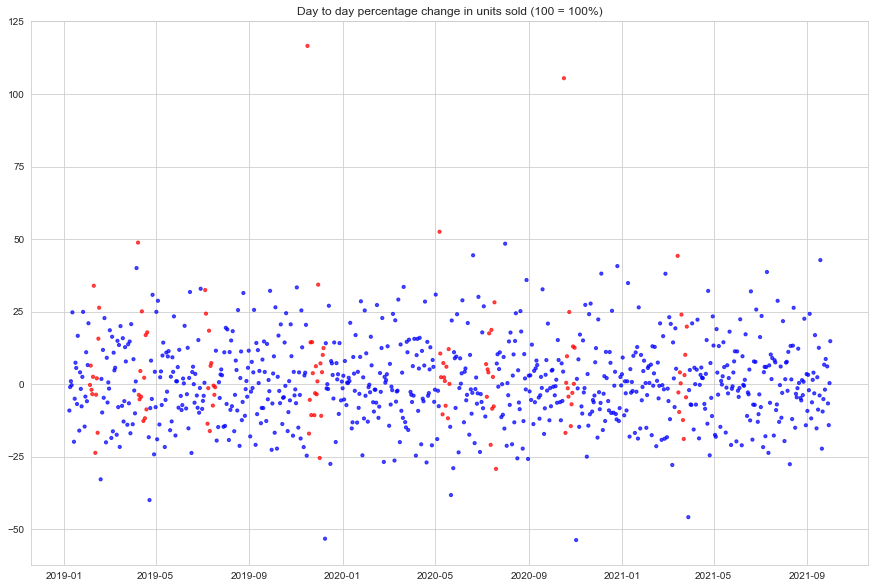

In [19]:
# Day to day percentage changes in units sold

x = df_sales['Date']
y = df_sales['Units_pct_change']
z = df_sales['Promo']
plt.figure(figsize=(15, 10))
plt.scatter(x, y, c=z, s=10, alpha=0.7, cmap='bwr')
plt.title('Day to day percentage change in units sold (100 = 100%)')

### <b> Revenue day to day with promo days highlighted </b>

Revenue per day, red indicate promo days whereas blue dots represent regular days
Some promotion periods are driving a sharp revenue increase, however due to lower price the effect is not as visible as in case of units sold

<b> TREND 9: Revenue day to day growth during promo period is clearly lower compared to sales growth and sometimes insignifcant, especially in 2019. We can therefore see that driving revenue growth by promos is more effective in 2021 compared to 2019 and 2020 </b>

<b> TREND 10: The promo in July 2020 is clealy ineffective. In fact, as we will see later, the revenue growth in that period is negative. It is also the soonest promo following another promo in dataset (two months distance). It suggests that promos must maintain some time distance (e.g. minimum three months) between each other to be effective (e.g. two promos in 2021) </b>

Text(0.5, 1.0, 'Revenue per day')

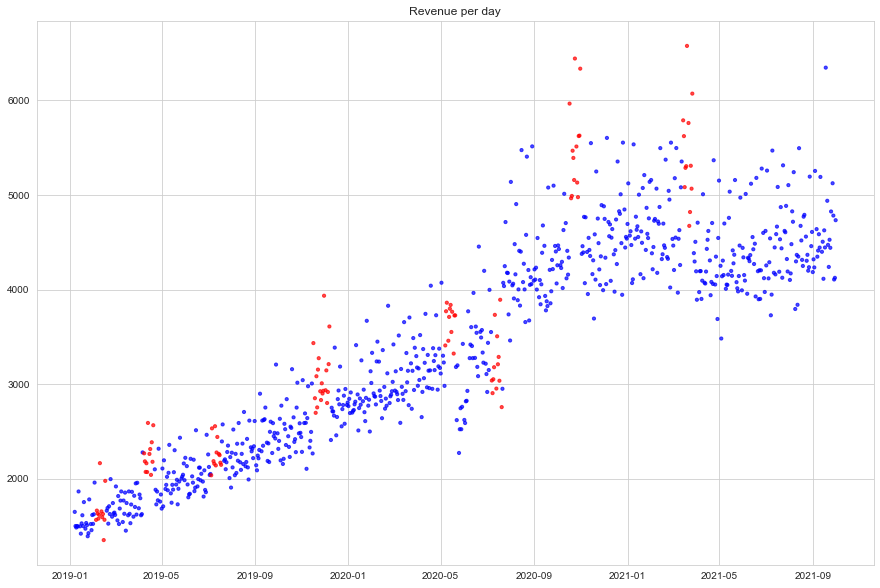

In [20]:
# Revenue per day, yellow

x = df_sales['Date']
y = df_sales['Revenue']
z = df_sales['Promo']
plt.figure(figsize=(15,10))
plt.scatter(x,y, c = z, s = 10, alpha = 0.7, cmap = 'bwr')
plt.title('Revenue per day')

# <b> Promotions trends and effectiveness </b>

### <b> Exploratory analysis </b>

In [21]:
# Intro exploration

df_promo.head()
df_promo.info()
df_promo.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  8 non-null      object        
 1   start_date  8 non-null      datetime64[ns]
 2   end_date    8 non-null      datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 320.0+ bytes


Unnamed: 0    False
start_date    False
end_date      False
dtype: bool

<b> Constructing new columns and variables for analysis </b>

To conduct meaningful analysis, we need to have data for each promotion period
We are interested in units sold per day, revenue per day, discount percentage and profit
This data will allow us to produce insights using initial sales data

In [22]:
# Adding columns for later data ingestion to df_promos

df_promo.rename(columns = {'Unnamed: 0':'Promo', 'start_date':'Start_date', 'end_date':'End_date'}, inplace = True)
df_promo['Days'] = '' #df_promo['End_date'] - df_promo['Start_date']
#df_promo['Num_of_days'] = pd.to_numeric(df_promo['Num_of_days'].dt.days, downcast='integer')
df_promo['Units_sold'] = ''
df_promo['Revenue'] = ''
df_promo['Rev_per_unit'] = ''
df_promo['Units_per_day'] = ''
df_promo['Rev_per_day'] = ''
df_promo['Promo_%'] = ''
df_promo['Profit_per_day'] = ''
df_promo

,Promo,Start_date,End_date,Days,Units_sold,Revenue,Rev_per_unit,Units_per_day,Rev_per_day,Promo_%,Profit_per_day
0,promo1,2019-02-03,2019-02-17,,,,,,,,
1,promo2,2019-04-08,2019-04-22,,,,,,,,
2,promo3,2019-07-05,2019-07-19,,,,,,,,
3,promo4,2019-11-16,2019-12-08,,,,,,,,
4,promo5,2020-05-07,2020-05-21,,,,,,,,
5,promo6,2020-07-07,2020-07-21,,,,,,,,
6,promo7,2020-10-17,2020-11-01,,,,,,,,
7,promo8,2021-03-14,2021-03-28,,,,,,,,


In [23]:
# Making sure it is sorted by date

df_promo.sort_values(by=['Start_date'])

,Promo,Start_date,End_date,Days,Units_sold,Revenue,Rev_per_unit,Units_per_day,Rev_per_day,Promo_%,Profit_per_day
0,promo1,2019-02-03,2019-02-17,,,,,,,,
1,promo2,2019-04-08,2019-04-22,,,,,,,,
2,promo3,2019-07-05,2019-07-19,,,,,,,,
3,promo4,2019-11-16,2019-12-08,,,,,,,,
4,promo5,2020-05-07,2020-05-21,,,,,,,,
5,promo6,2020-07-07,2020-07-21,,,,,,,,
6,promo7,2020-10-17,2020-11-01,,,,,,,,
7,promo8,2021-03-14,2021-03-28,,,,,,,,


<b> Function to populate columns about promotion periods </b>

Constructing function gives us flexibility and allows to re-use it in case of additional data, different periods etc

Function loops over sales data and populates the df_promo table with main indicators for each promotion period separately

In [24]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 1 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              857 non-null    datetime64[ns]
 1   Units_sold        857 non-null    int64         
 2   Revenue           857 non-null    float64       
 3   Promo             857 non-null    int64         
 4   Units_pct_change  856 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 40.2 KB


In [25]:
 # Populating the table df_promo with data regarding the promotions performance

def promo_indicators():
    global df_sales
    global df_promo
    x1 = 0
    while x1 < 8:
        start_date = df_promo.iloc[x1,1]
        end_date = df_promo.iloc[x1,2]
        period = ((df_sales.loc[:,'Date'] >= start_date) & (df_sales.loc[:,'Date'] < end_date))
        period = df_sales.loc[period]
        num_of_days_2 = len(period)
        df_promo.iloc[x1,3] = num_of_days_2
        uni_sold = period.loc[:,'Units_sold'].sum()
        df_promo.iloc[x1,4] = uni_sold
        revenue = round(period.loc[:,'Revenue'].sum(), 2)
        df_promo.iloc[x1,5] = revenue
        rev_per_unit = round(period['Revenue'].sum() / period['Units_sold'].sum(), 2)
        df_promo.iloc[x1,6] = rev_per_unit
        uni_per_day = round(period['Units_sold'].mean(), 2)
        df_promo.iloc[x1,7] = uni_per_day
        rev_per_day = round(period['Revenue'].mean(), 2)
        df_promo.iloc[x1,8] = rev_per_day
        promo_percent = (abs((rev_per_unit - 5) / 5) * 100).round(decimals=0)
        df_promo.iloc[x1,9] = promo_percent
        profit_per_day = ((revenue - uni_sold * 3.25) / num_of_days_2).round(decimals = 2)
        df_promo.iloc[x1,10] = profit_per_day
        x1 += 1
    print(df_promo)
promo_indicators()

    Promo Start_date   End_date Days Units_sold   Revenue Rev_per_unit  \
0  promo1 2019-02-03 2019-02-17   12       4994  20002.79         4.01   
1  promo2 2019-04-08 2019-04-22   12       8086  27106.48         3.35   
2  promo3 2019-07-05 2019-07-19   12       7239  27167.51         3.75   
3  promo4 2019-11-16 2019-12-08   19      16679  58416.03          3.5   
4  promo5 2020-05-07 2020-05-21   12      11713  43950.93         3.75   
5  promo6 2020-07-07 2020-07-21   12       9634  38559.51          4.0   
6  promo7 2020-10-17 2020-11-01   13      21366  71599.93         3.35   
7  promo8 2021-03-14 2021-03-28   12      17426  65373.12         3.75   

  Units_per_day Rev_per_day Promo_% Profit_per_day  
0        416.17      1666.9    20.0         314.36  
1        673.83     2258.87    33.0          68.91  
2        603.25     2263.96    25.0          303.4  
3        877.84     3074.53    30.0         221.54  
4        976.08     3662.58    25.0         490.31  
5        802.83

<b> Sorting promotion periods by profit per day </b>

We want to see how different promotion periods perform when sorted according to the profit they generate

In [26]:
# Sorting by profit per day

df_promo = df_promo.sort_values(['Profit_per_day'], ascending = False)

### <b> Table with each promotion period </b>

<b> TREND: The higher the discount percentage, the low the profit per day for the promotion period </b>

<b> TREND: Considering profit per day, the most effective are promotions with lowest discount: either 20% or 25% </b>

<b> TREND: Considering revenue per day, the last two promos are by far most effective. There is also a visible correlation between the date and revenue (the later the promo data, the higher the revenue). It is consistent with our earlier analysis of revenue data </b>

There is a general upward tendency (the later the promo, the higher the gross margin profit) due to overall increase in revenue

In [27]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(df_promo)

,Promo,Start_date,End_date,Days,Units_sold,Revenue,Rev_per_unit,Units_per_day,Rev_per_day,Promo_%,Profit_per_day
7,promo8,2021-03-14,2021-03-28,12,17426,65373.12,3.75,1452.17,5447.76,25.0,728.22
5,promo6,2020-07-07,2020-07-21,12,9634,38559.51,4.0,802.83,3213.29,20.0,604.08
4,promo5,2020-05-07,2020-05-21,12,11713,43950.93,3.75,976.08,3662.58,25.0,490.31
0,promo1,2019-02-03,2019-02-17,12,4994,20002.79,4.01,416.17,1666.9,20.0,314.36
2,promo3,2019-07-05,2019-07-19,12,7239,27167.51,3.75,603.25,2263.96,25.0,303.4
3,promo4,2019-11-16,2019-12-08,19,16679,58416.03,3.5,877.84,3074.53,30.0,221.54
6,promo7,2020-10-17,2020-11-01,13,21366,71599.93,3.35,1643.54,5507.69,33.0,166.19
1,promo2,2019-04-08,2019-04-22,12,8086,27106.48,3.35,673.83,2258.87,33.0,68.91


### <b> Relationship between profit per day, date and discount percrentage </b>

The darker the colour, the lower the discount percentage

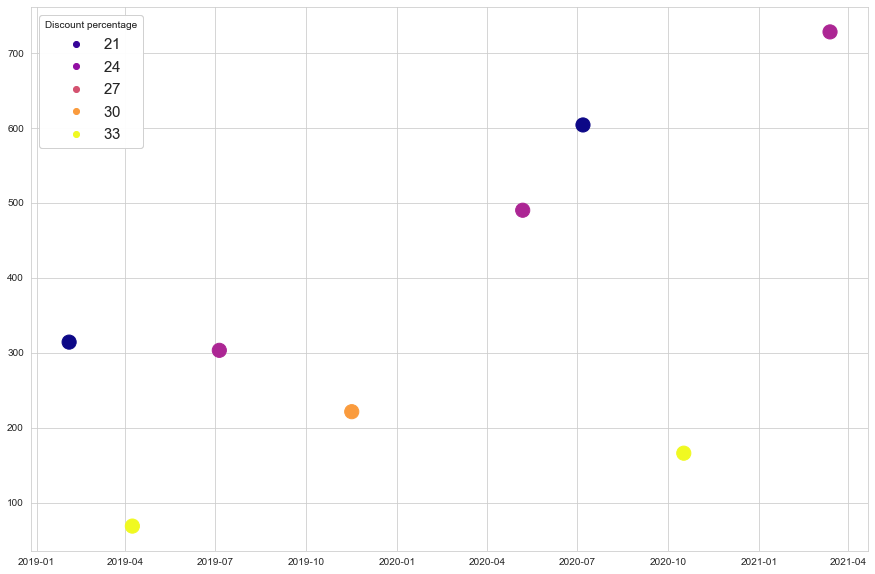

In [28]:
# Visualisation of relationship between promotion percentage, profit per day and date

x = df_promo['Start_date']
y = df_promo['Profit_per_day']
z = df_promo['Promo_%']
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=200, cmap='plasma')
legend1 = ax.legend(*scatter.legend_elements(num=5), loc='upper left', title='Discount percentage', prop=dict(size=15))
ax.add_artist(legend1)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

<b> Producing descriptive data about the regular period (hence days without any promotions) </b>

Descriptive data about normal days

In [29]:
# Filtering out days within promo periods
# Looking at "regular" days

df_sales_no_promo = df_sales[df_sales['Promo'] == 0]
df_sales_no_promo.describe()

,Units_sold,Revenue,Promo,Units_pct_change
count,753.000,753.000,753.0,752.000
mean,683.044,3412.942,0.0,0.678
std,222.798,1115.335,0.0,14.170
min,278.000,1392.913,0.0,-53.728
25%,486.000,2422.113,0.0,-8.132
50%,687.000,3420.545,0.0,-0.202
75%,871.000,4356.061,0.0,9.025
max,1269.000,6347.215,0.0,48.410


<b> Main indicators for the normal period </b>

In [30]:
# Calculating main indicators for the performance outside promotion period

tot_units_norm = df_sales_no_promo['Units_sold'].sum()
tot_rev_norm = df_sales_no_promo['Revenue'].sum()
rev_per_item = (df_sales_no_promo['Revenue'].sum() / df_sales_no_promo['Units_sold'].sum()).round(decimals = 0)
uni_per_day_no_promo = df_sales_no_promo['Units_sold'].mean()
print(f'Units per day without promo period: {uni_per_day_no_promo}')
rev_per_day_no_promo = df_sales_no_promo['Revenue'].mean()
print(f'Revenue per day without promo period: {rev_per_day_no_promo}')
num_of_days = len(df_sales_no_promo)
first_day = pd.to_datetime(df_sales_no_promo.iloc[0,0])
last_day = pd.to_datetime(df_sales_no_promo.iloc[-1,0])
promo = 0.0
profit_per_day_no_promo = int((rev_per_day_no_promo - (uni_per_day_no_promo * 3.25)))
print(f'Profit per day without promo period: {profit_per_day_no_promo}')

Units per day without promo period: 683.0438247011953
Revenue per day without promo period: 3412.941638129025
Profit per day without promo period: 1193


Adding indicators for regular period to the table to allow comparison with data for different promo periods

In [31]:
# Adding indicators for regular period to the table to allow comparison with data for promo periods

df_promo.loc[df_promo.shape[0]] = ['No_promo_days', first_day, last_day, len(df_sales_no_promo), tot_units_norm, tot_rev_norm, rev_per_item, uni_per_day_no_promo, rev_per_day_no_promo, 0.0, profit_per_day_no_promo]
df_promo.head(10)

,Promo,Start_date,End_date,Days,Units_sold,Revenue,Rev_per_unit,Units_per_day,Rev_per_day,Promo_%,Profit_per_day
7,promo8,2021-03-14,2021-03-28,12,17426,65373.12,3.75,1452.17,5447.76,25.0,728.22
5,promo6,2020-07-07,2020-07-21,12,9634,38559.51,4.0,802.83,3213.29,20.0,604.08
4,promo5,2020-05-07,2020-05-21,12,11713,43950.93,3.75,976.08,3662.58,25.0,490.31
0,promo1,2019-02-03,2019-02-17,12,4994,20002.79,4.01,416.17,1666.9,20.0,314.36
2,promo3,2019-07-05,2019-07-19,12,7239,27167.51,3.75,603.25,2263.96,25.0,303.4
3,promo4,2019-11-16,2019-12-08,19,16679,58416.03,3.5,877.84,3074.53,30.0,221.54
6,promo7,2020-10-17,2020-11-01,13,21366,71599.93,3.35,1643.54,5507.69,33.0,166.19
1,promo2,2019-04-08,2019-04-22,12,8086,27106.48,3.35,673.83,2258.87,33.0,68.91
8,No_promo_days,2019-01-07,2021-10-01,753,514332,2569945.054,5.0,683.044,3412.942,0.0,1193


In [32]:
# Adding row with mean values for promotion periods for comparison

df_promo.loc['Mean'] = df_promo.iloc[:,3:].mean(axis = 0)
df_promo.iloc[9,0] = ['Mean_promo']

### <b> Table with data for each promotion period, average data for promotion periods and average data for non-promo days </b>

<b> TREND: Every promotion period has significantly lower profit per day compared to average non-promo day. Therefore considering the profit per day, the promotions are not effective </b>

However, as we know, the growth of revenue and units sold over the analysed period was significant and thus comparing against only average data does not show the entire picture

Next operation will produce complete and detailed picture of impact and effectiveness of promotion periods.

<b> Each promo period will be compared against average data for its preceding 30 days </b>

This way most, the accurate comparison will be produced and full context will be shown

The comparison will be implemented using function that loop over data from sales and produced detail account of indicators for 30 days preceding each promo period



In [33]:
# New dataframe with all the essential data about promotions performance

df_all_data = df_promo
df_all_data

,Promo,Start_date,End_date,Days,Units_sold,Revenue,Rev_per_unit,Units_per_day,Rev_per_day,Promo_%,Profit_per_day
7,promo8,2021-03-14,2021-03-28,12,17426,65373.12,3.75,1452.17,5447.76,25.0,728.22
5,promo6,2020-07-07,2020-07-21,12,9634,38559.51,4.0,802.83,3213.29,20.0,604.08
4,promo5,2020-05-07,2020-05-21,12,11713,43950.93,3.75,976.08,3662.58,25.0,490.31
0,promo1,2019-02-03,2019-02-17,12,4994,20002.79,4.01,416.17,1666.9,20.0,314.36
2,promo3,2019-07-05,2019-07-19,12,7239,27167.51,3.75,603.25,2263.96,25.0,303.4
3,promo4,2019-11-16,2019-12-08,19,16679,58416.03,3.5,877.84,3074.53,30.0,221.54
6,promo7,2020-10-17,2020-11-01,13,21366,71599.93,3.35,1643.54,5507.69,33.0,166.19
1,promo2,2019-04-08,2019-04-22,12,8086,27106.48,3.35,673.83,2258.87,33.0,68.91
8,No_promo_days,2019-01-07,2021-10-01,753,514332,2569945.054,5.0,683.044,3412.942,0.0,1193
Mean,Mean_promo,NaT,NaT,95.222,67941.0,324680.15,3.829,903.195,3389.836,23.444,454.446


In [34]:
# New table to be populated with data

df_ROI = pd.DataFrame()
df_ROI['Promo_period'] = df_all_data['Promo'] # 0
df_ROI['Promo_%'] = df_all_data['Promo_%'] # 1
df_ROI['Units_sold_per_day_promo'] = df_all_data['Units_per_day'] # 2
df_ROI['Revenue_per_day_promo'] = df_all_data['Rev_per_day'] # 3
df_ROI['Profit_per_day_promo'] = df_all_data['Profit_per_day'] # 4
df_ROI['Units_sold_per_day_bef_promo'] = '' # 5
df_ROI['Revenue_per_day_bef_promo'] = '' # 6
df_ROI['Profit_per_day_bef_promo'] = '' # 7
df_ROI['Units_change_%'] = '' # 8
df_ROI['Revenue_change_%'] = '' # 9
df_ROI['Profit_ROI_%'] = '' # 10
df_ROI = df_ROI.drop(df_ROI.index[[-1,-2]])
df_ROI

,Promo_period,Promo_%,Units_sold_per_day_promo,Revenue_per_day_promo,Profit_per_day_promo,Units_sold_per_day_bef_promo,Revenue_per_day_bef_promo,Profit_per_day_bef_promo,Units_change_%,Revenue_change_%,Profit_ROI_%
7,promo8,25.0,1452.17,5447.76,728.22,,,,,,
5,promo6,20.0,802.83,3213.29,604.08,,,,,,
4,promo5,25.0,976.08,3662.58,490.31,,,,,,
0,promo1,20.0,416.17,1666.9,314.36,,,,,,
2,promo3,25.0,603.25,2263.96,303.4,,,,,,
3,promo4,30.0,877.84,3074.53,221.54,,,,,,
6,promo7,33.0,1643.54,5507.69,166.19,,,,,,
1,promo2,33.0,673.83,2258.87,68.91,,,,,,


In [35]:
# Function to produce indicators about preceding 30 days for each promo period

def before_promo_indicators():
    global df_sales
    global df_promo
    x3 = 0
    while x3 < 8:
        end_date = df_promo.iloc[x3,1]
        start_date = (df_promo.iloc[x3,1] - timedelta(days=30))
        period = ((df_sales.loc[:,'Date'] >= start_date) & (df_sales.loc[:,'Date'] < end_date))
        period = df_sales.loc[period]
        uni_per_day_bef_promo = round(period['Units_sold'].mean(), 2)
        df_ROI.iloc[x3,5] = uni_per_day_bef_promo
        rev_per_day_bef_promo = round(period['Revenue'].mean(), 2)
        df_ROI.iloc[x3,6] = rev_per_day_bef_promo
        profit_per_day_bef_promo = int((rev_per_day_bef_promo - (uni_per_day_bef_promo * 3.25)))
        df_ROI.iloc[x3,7] = profit_per_day_bef_promo
        x3 += 1
before_promo_indicators()

In [36]:
def roi_indicators():
    global df_ROI
    x4 = 0
    while x4 < 8:
        uni_change = round((df_ROI.iloc[x4,2] - df_ROI.iloc[x4,5])/df_ROI.iloc[x4,5], 2) * 100
        df_ROI.iloc[x4,8] = uni_change
        rev_change = round((df_ROI.iloc[x4,3] - df_ROI.iloc[x4,6])/df_ROI.iloc[x4,6], 2) * 100
        df_ROI.iloc[x4,9] = rev_change
        profit_change = round((df_ROI.iloc[x4,4] - df_ROI.iloc[x4,7])/df_ROI.iloc[x4,7], 2) * 100
        df_ROI.iloc[x4,10] = profit_change
        x4 += 1
roi_indicators()

## <b> Table with units sold, revenue and profit percentage change </b>

<b> Table evaluating each promotional perod performance in comparison to preceding 30 days </b>

To evaluate the performance of each promotional period, I compare its mean indicators to mean indicators of preceding 30 days

The comparison consists of:
1. Percentage change in number of units sold
2. Percentage change in revenue
3. Percentage change in profit

<b> Return on investment is calculated based on the profit </b>

The average profit per day of preceding month is an unrealised gain (due to presence of promotion instead), therefore it is considered the cost of promotion
The average profit per day for promotional period is considered the revenue gained on investment

<b> ROI = (Profit during promotion per day - Profit during preceding month per day) / Profit during preceding month per day </b>

<b> If the average profit during promotional period is higher than during preceding month, the ROI is positive. If it is lower, it is negative </b>

<b> Alternatively: if our main focus is on the growth and scaling-up instead of profitability,  we can also look at the revenue </b>

In [37]:
df_ROI = df_ROI.sort_values(['Revenue_change_%'], ascending = False)
df_ROI

,Promo_period,Promo_%,Units_sold_per_day_promo,Revenue_per_day_promo,Profit_per_day_promo,Units_sold_per_day_bef_promo,Revenue_per_day_bef_promo,Profit_per_day_bef_promo,Units_change_%,Revenue_change_%,Profit_ROI_%
1,promo2,33.0,673.83,2258.87,68.91,348.16,1743.52,612,94.0,30.0,-89.0
6,promo7,33.0,1643.54,5507.69,166.19,866.46,4335.31,1519,90.0,27.0,-89.0
3,promo4,30.0,877.84,3074.53,221.54,516.35,2584.12,905,70.0,19.0,-76.0
7,promo8,25.0,1452.17,5447.76,728.22,942.23,4713.92,1651,54.0,16.0,-56.0
4,promo5,25.0,976.08,3662.58,490.31,653.58,3270.62,1146,49.0,12.0,-57.0
2,promo3,25.0,603.25,2263.96,303.4,406.54,2035.2,713,48.0,11.0,-57.0
0,promo1,20.0,416.17,1666.9,314.36,313.21,1568.22,550,33.0,6.0,-43.0
5,promo6,20.0,802.83,3213.29,604.08,694.36,3474.5,1217,16.0,-8.0,-50.0


### <b> Promotion periods effectiveness and ROI based on units, revenue and profit % change compared to preceding month </b>

The analysis is based on comparison against preceding and analogical 30 days for each promo period (as explain above)

<b> TREND: For each promo period, the units sales have increased. The highest increase is for highest discount (positive correlation between discount % and units sale). The promotions were VERY EFFECTIVE at increasing sales, almost doubling it in some cases (94% increase) </b>

<b> TREND: The revenue change has increased visibly (around 20% or more) for the promos with highest discount %. However, for the lowest promotions it has increased only slightly or even decreased. The promotions were generally EFFECTIVE at increasing revenue </b>

<b> TREND: For each promo period, the profit has decreased significantly. There is clear discrepancy between low discount and high discount periods: during the former, the profit decreased around 50%, wherease for highest discount (33%) the profit decreased by whopping 89%. This is caused by revenue per unit being very close to cost per unit, hence only minimal profit was generated. The promotions were VERY INEFFETIVE at increasing profit </b>

<b> ROI for profit: return on investment for every promotion, considering profitability, was negative or very negative </b>
<b> ROI for revenue: return on inverstment for every promo, considering growth of revenue, was overally positive and did accomplish boost in revenue </b>

<b> CONCLUDING: considering profit, the promotions must be considered as unsuccesful attempt at increasing profitability. However, considering the revenue, the promotions did contribute to significant rise in growth, which was especially visible on graphs. In 2021, promotion was basically driving the revenue growth. </b>



In [41]:
from tabulate import tabulate


df_ROI_short = df_ROI.iloc[:,np.r_[0,1,8,9,10]]
df_ROI_short = df_ROI_short.sort_values(['Profit_ROI_%'], ascending = False)
df_ROI_short = df_ROI_short.set_index(['Promo_period'])
print(df_ROI_short)

             Promo_% Units_change_% Revenue_change_% Profit_ROI_%
Promo_period                                                     
promo1         20.0       33.0             6.0          -43.0    
promo6         20.0       16.0            -8.0          -50.0    
promo8         25.0       54.0            16.0          -56.0    
promo5         25.0       49.0            12.0          -57.0    
promo3         25.0       48.0            11.0          -57.0    
promo4         30.0       70.0            19.0          -76.0    
promo2         33.0       94.0            30.0          -89.0    
promo7         33.0       90.0            27.0          -89.0    


In [49]:
print(tabulate(df_ROI_short, headers='keys', tablefmt='psql'))

+----------------+-----------+------------------+--------------------+----------------+
| Promo_period   |   Promo_% |   Units_change_% |   Revenue_change_% |   Profit_ROI_% |
|----------------+-----------+------------------+--------------------+----------------|
| promo1         |        20 |               33 |                  6 |            -43 |
| promo6         |        20 |               16 |                 -8 |            -50 |
| promo8         |        25 |               54 |                 16 |            -56 |
| promo5         |        25 |               49 |                 12 |            -57 |
| promo3         |        25 |               48 |                 11 |            -57 |
| promo4         |        30 |               70 |                 19 |            -76 |
| promo2         |        33 |               94 |                 30 |            -89 |
| promo7         |        33 |               90 |                 27 |            -89 |
+----------------+-----------+--